In [ ]:
import data_io
from tensorflow.keras.models import load_model

model_file = "./saved_model/cnn_dense_FT4"
model = load_model(model_file)

test_loader = data_io.ImageDataGenerator(
    batch_size=1,
    shuffle=False,
    mode='test',
    overlying=False,
    data_augmentation=False)
y = model.predict(test_loader)


In [ ]:
from matplotlib import pyplot as plt
from glob import glob

gt_loader = data_io.ImageDataGenerator(
    batch_size=1,
    shuffle=False,
    mode='test',
    data_augmentation=False)

for idx, img in enumerate(y):
    print(img.shape)
    fig, ax  = plt.subplots(1, 2, figsize=(40, 30))
    ax[0].plot(y[idx,:,:])
    _, gt = gt_loader.__getitem__(idx)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].imshow(gt[0,:,:], cmap='gray')
    plt.show() 

In [ ]:
from matplotlib import pyplot as plt
from glob import glob

gt_loader = data_io.ImageDataGenerator(
    batch_size=1,
    shuffle=False,
    mode='test',
    data_augmentation=False)

for idx, img in enumerate(y):
    print(img.shape)
    fig, ax  = plt.subplots(1, 2, figsize=(40, 30))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].imshow(y[idx,:,:], cmap='gray')
    _, gt = gt_loader.__getitem__(idx)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].imshow(gt[0,:,:], cmap='gray')
    plt.show() 



## Test result of SoS prediction

In [2]:
import data_io
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from glob import glob
import cv2 

model_file = "./saved_model/SoS_prediction_6"
model = load_model(model_file)

test_loader = data_io.SoSGenerator(
    batch_size=1,
    shuffle=False,
    mode='test',
    data_augmentation=False)
y = model.predict(test_loader)

gt_loader = data_io.SoSGenerator(
    batch_size=1,
    shuffle=False,
    mode='test',
    data_augmentation=False)

print('| DNN prediction |  Ground Truth  |   difference   |')
for idx, y in enumerate(y):
    if idx % 2 == 0:
        continue
    x, gt = gt_loader.__getitem__(idx)  
    print('{0:>16f}{1:>16f}{2:>16f}'.format(y[0], gt[0][0], y[0] - gt[0][0]))


| DNN prediction |  Ground Truth  |   difference   |
      -49.863651      -53.138597        3.274946
      -75.233643      -74.827720       -0.405923
      -50.740273      -49.525593       -1.214679
      -28.861485      -32.031875        3.170390
      -68.545479      -65.278354       -3.267125
      -70.889870      -70.126826       -0.763044
      -53.654064      -52.893154       -0.760910
      -30.091017      -34.703017        4.612000
      -59.940125      -57.832821       -2.107303
      -40.947964      -42.784110        1.836146
      -36.928123      -45.302487        8.374363
       15.655543        6.515583        9.139960
       -7.242266      -11.039526        3.797260
      -28.557970      -35.934067        7.376097
      -73.750259      -72.105290       -1.644969
      -19.808510      -23.445039        3.636529
      -88.622375      -87.719687       -0.902689
       26.042086       26.312538       -0.270452
     -129.909073     -128.537259       -1.371814
      -23.483227

## Test result of SoS map segmentation
Only first 7 samples are shown.

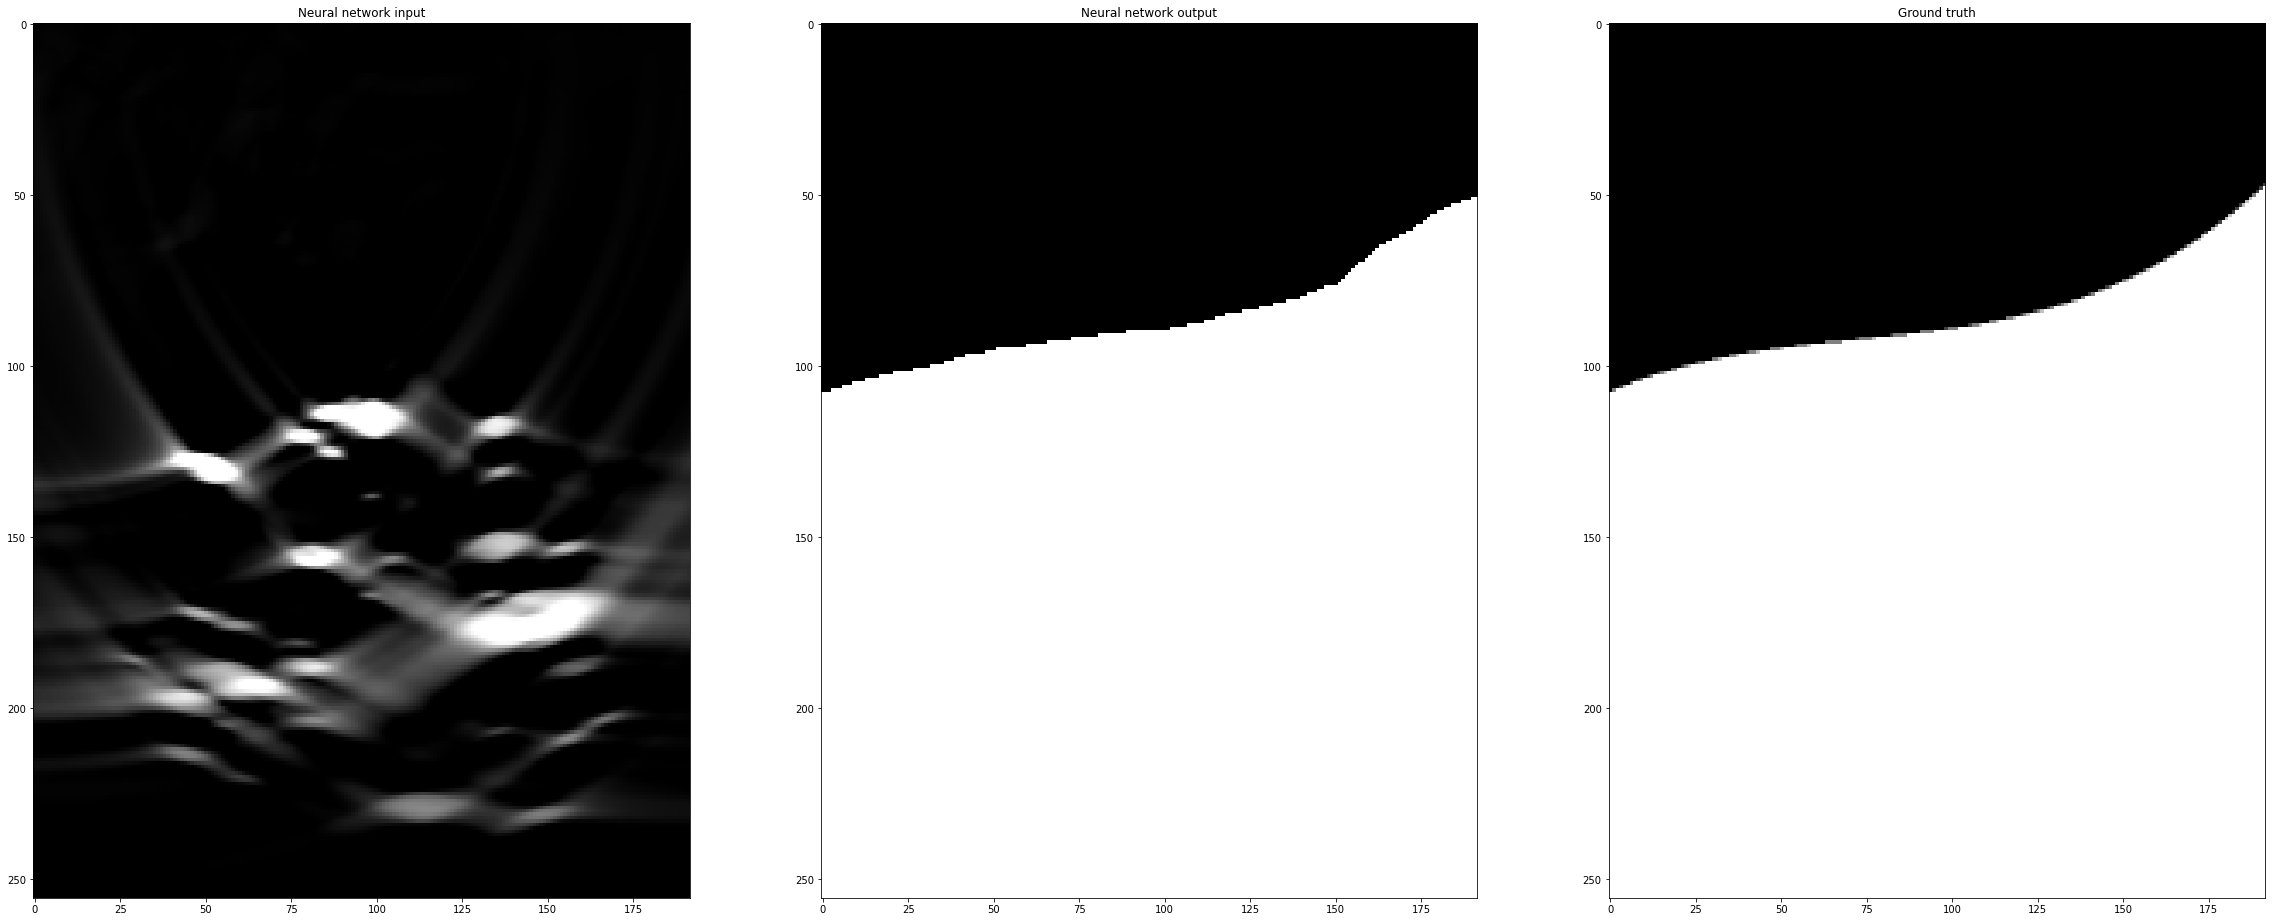

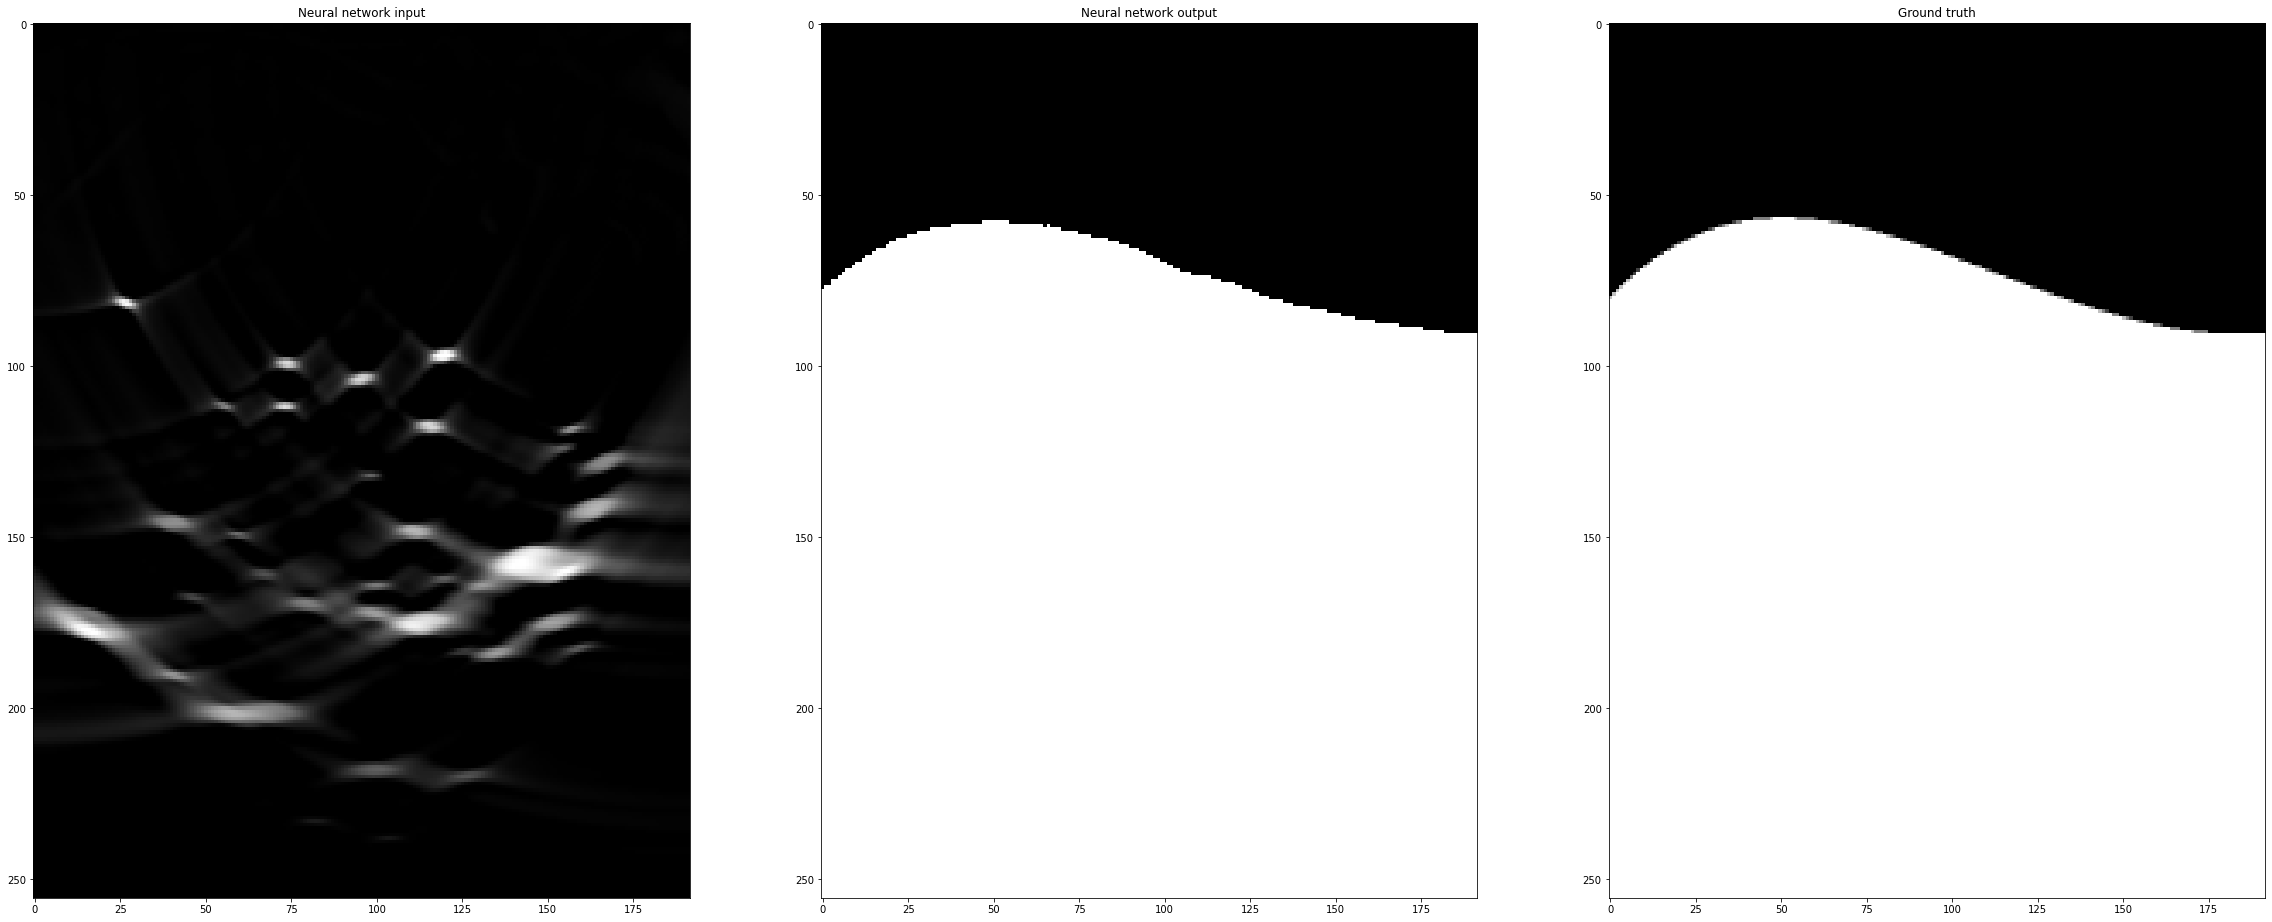

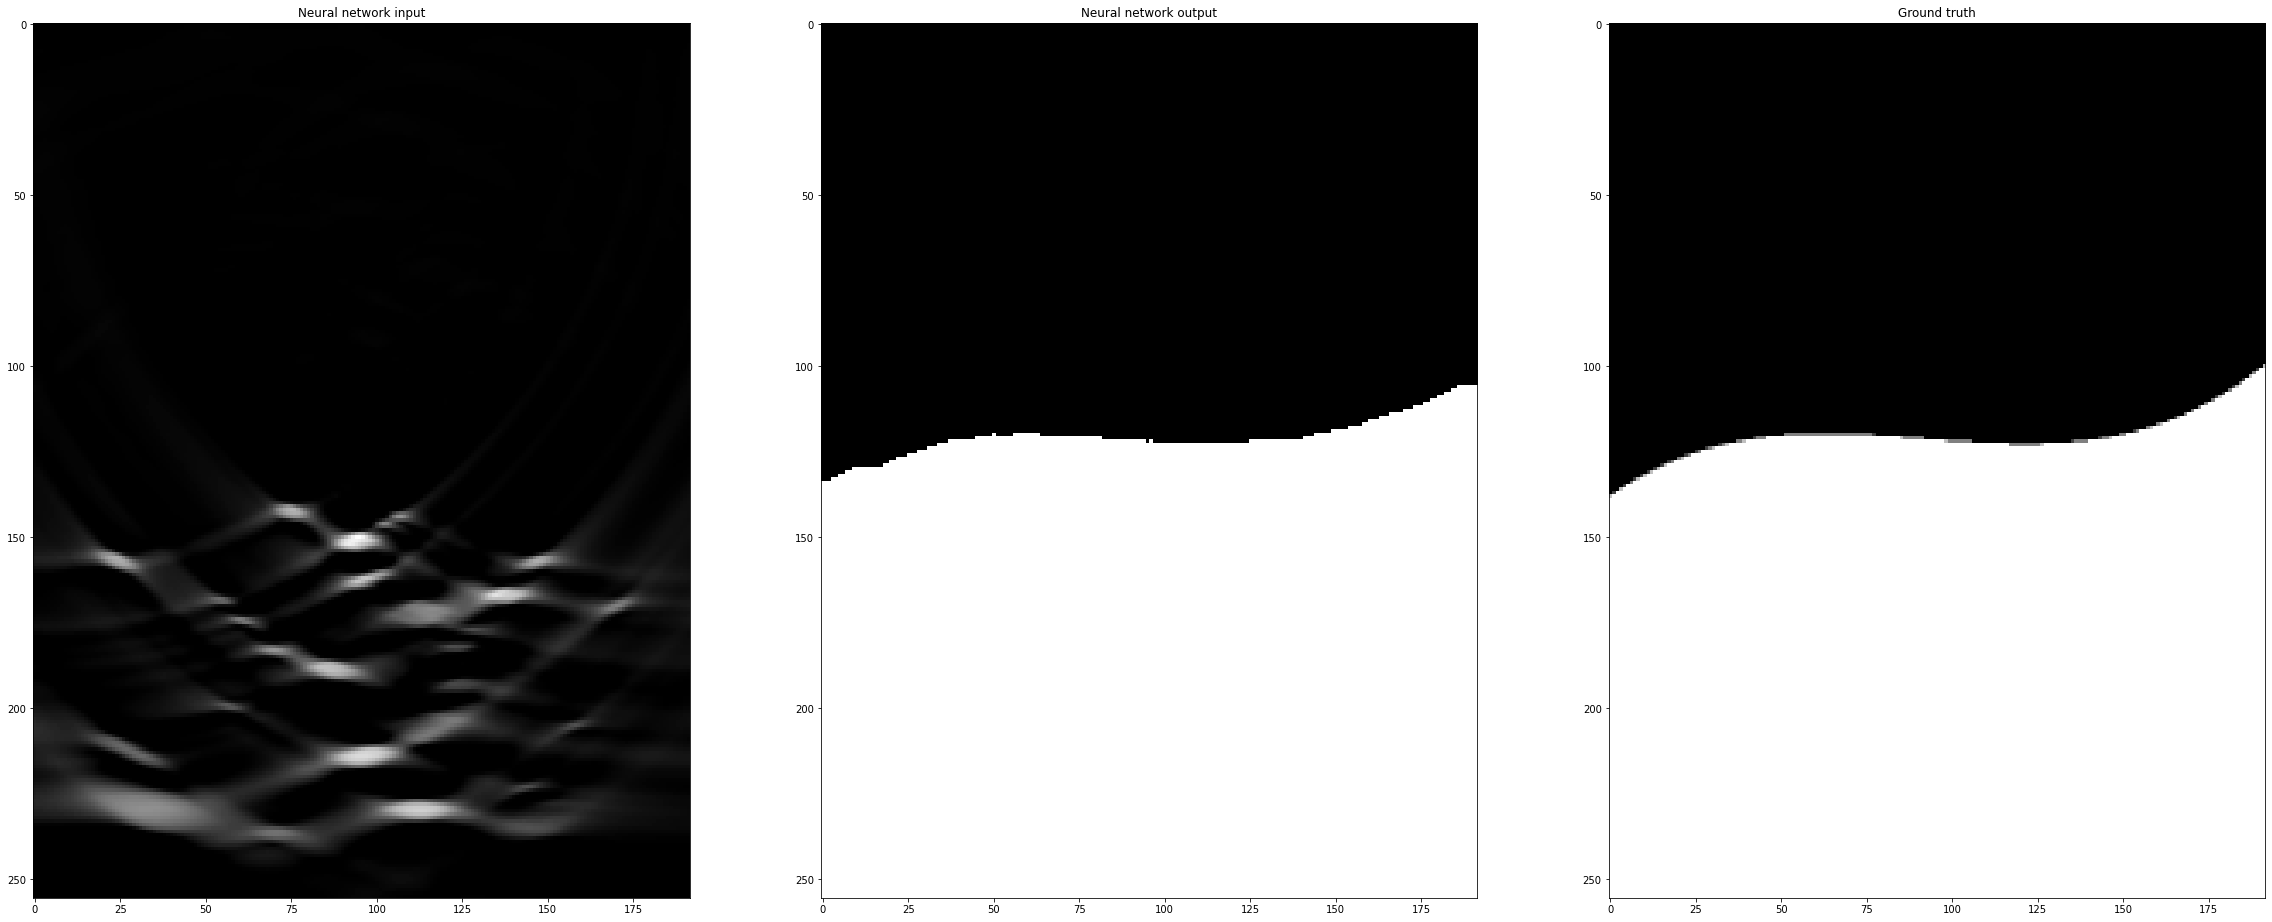

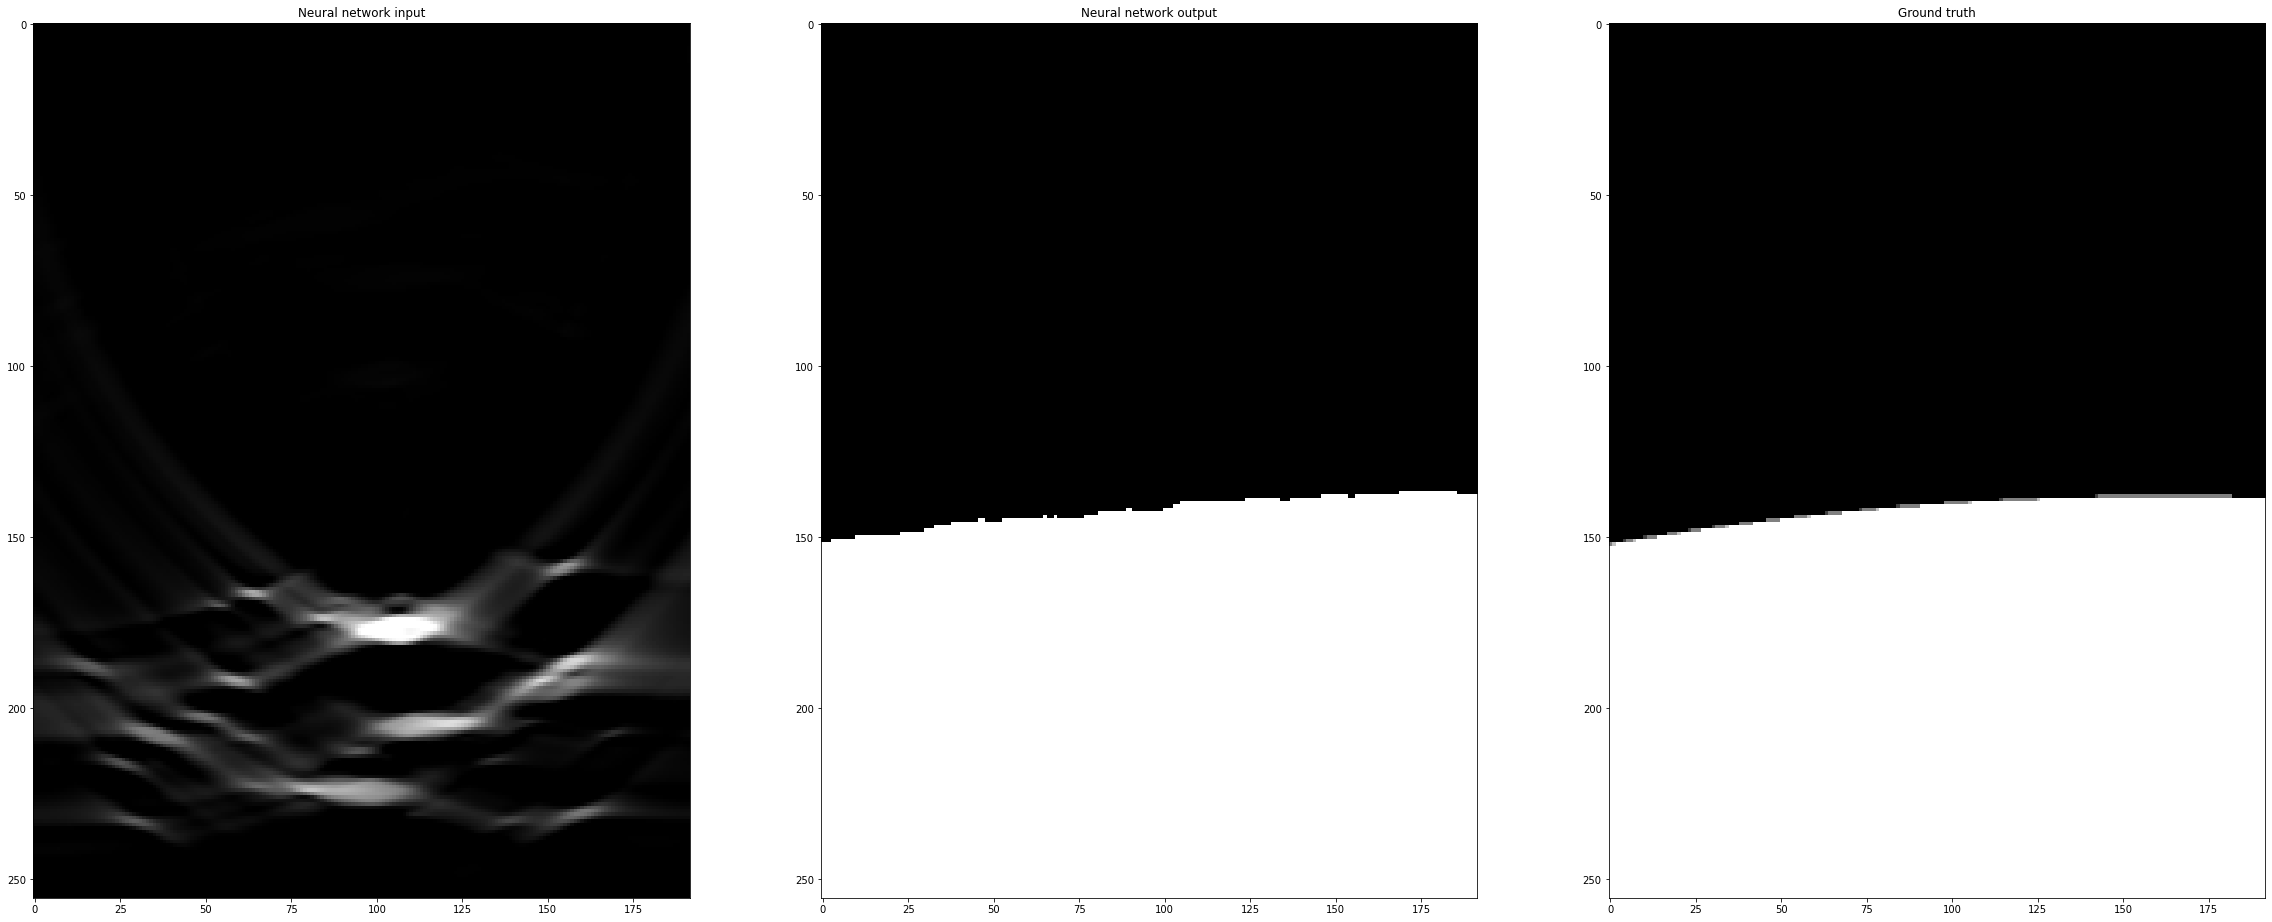

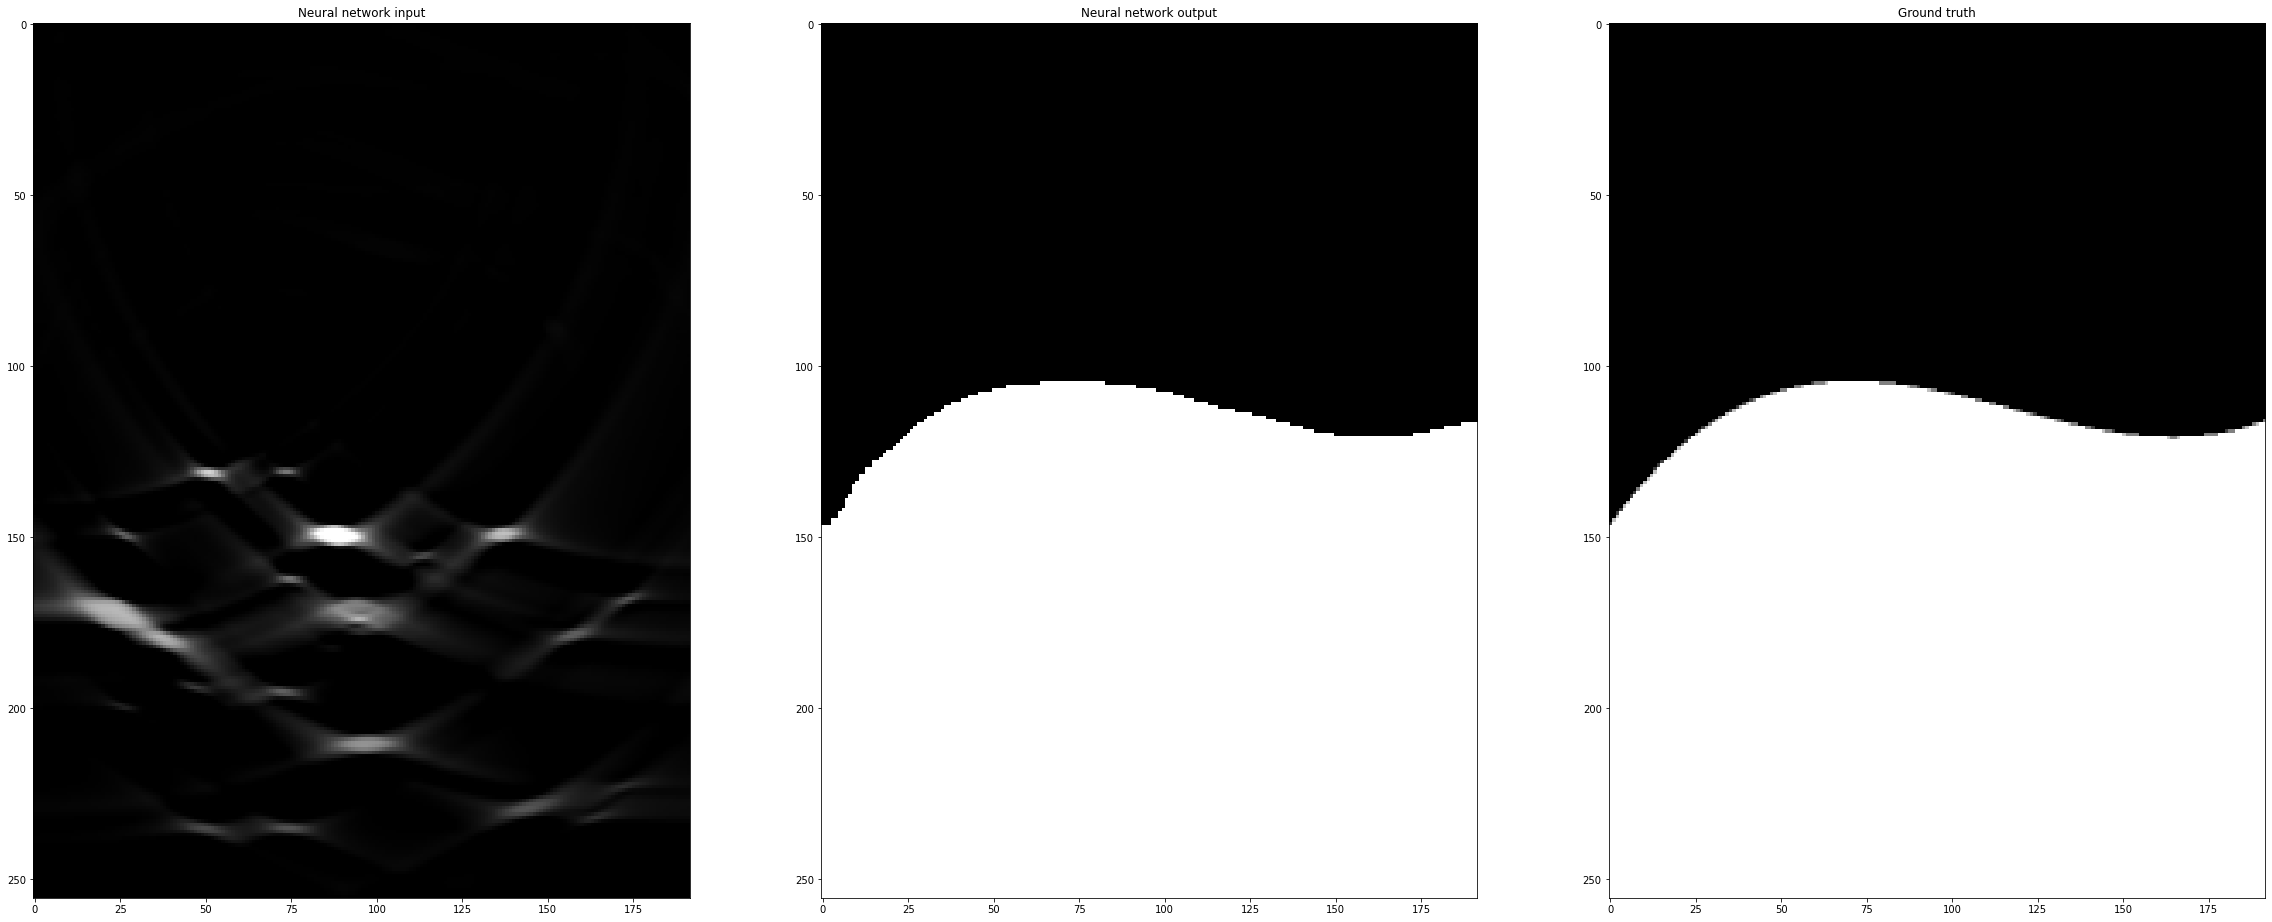

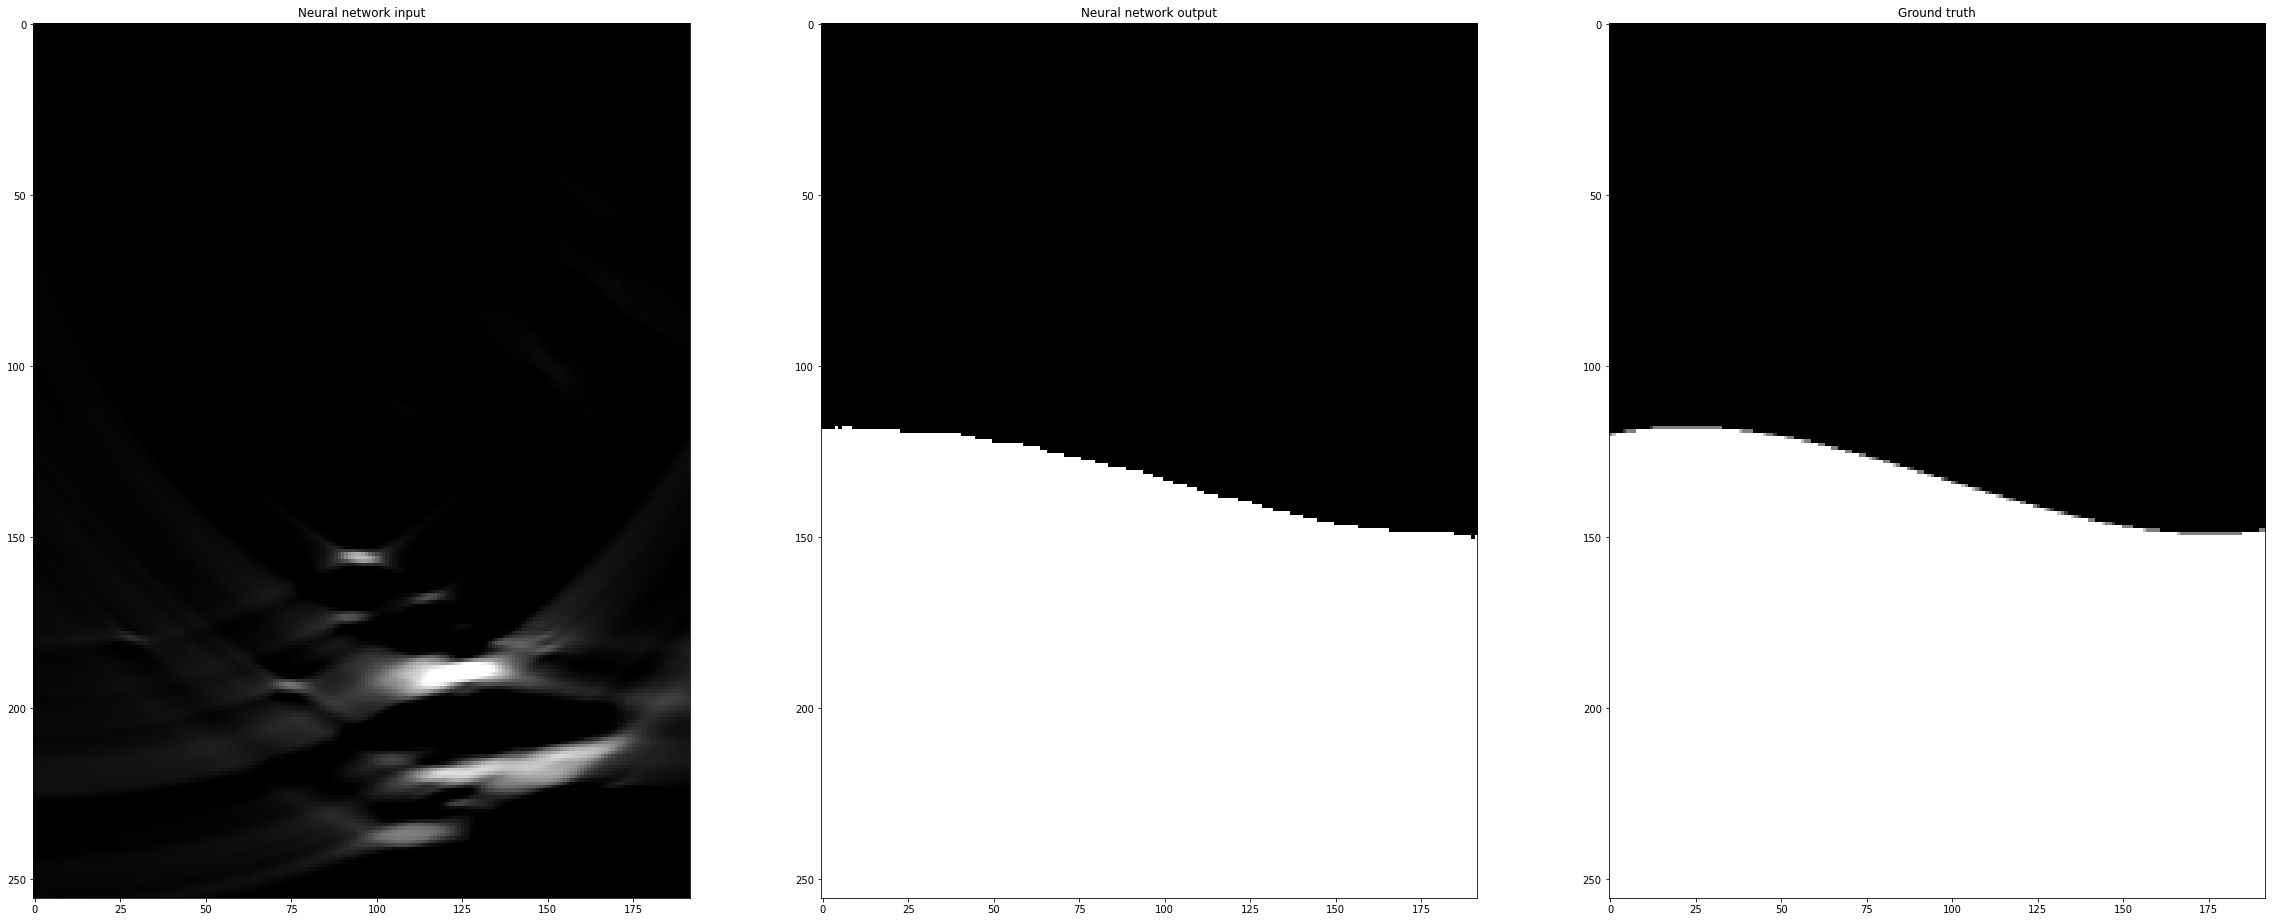

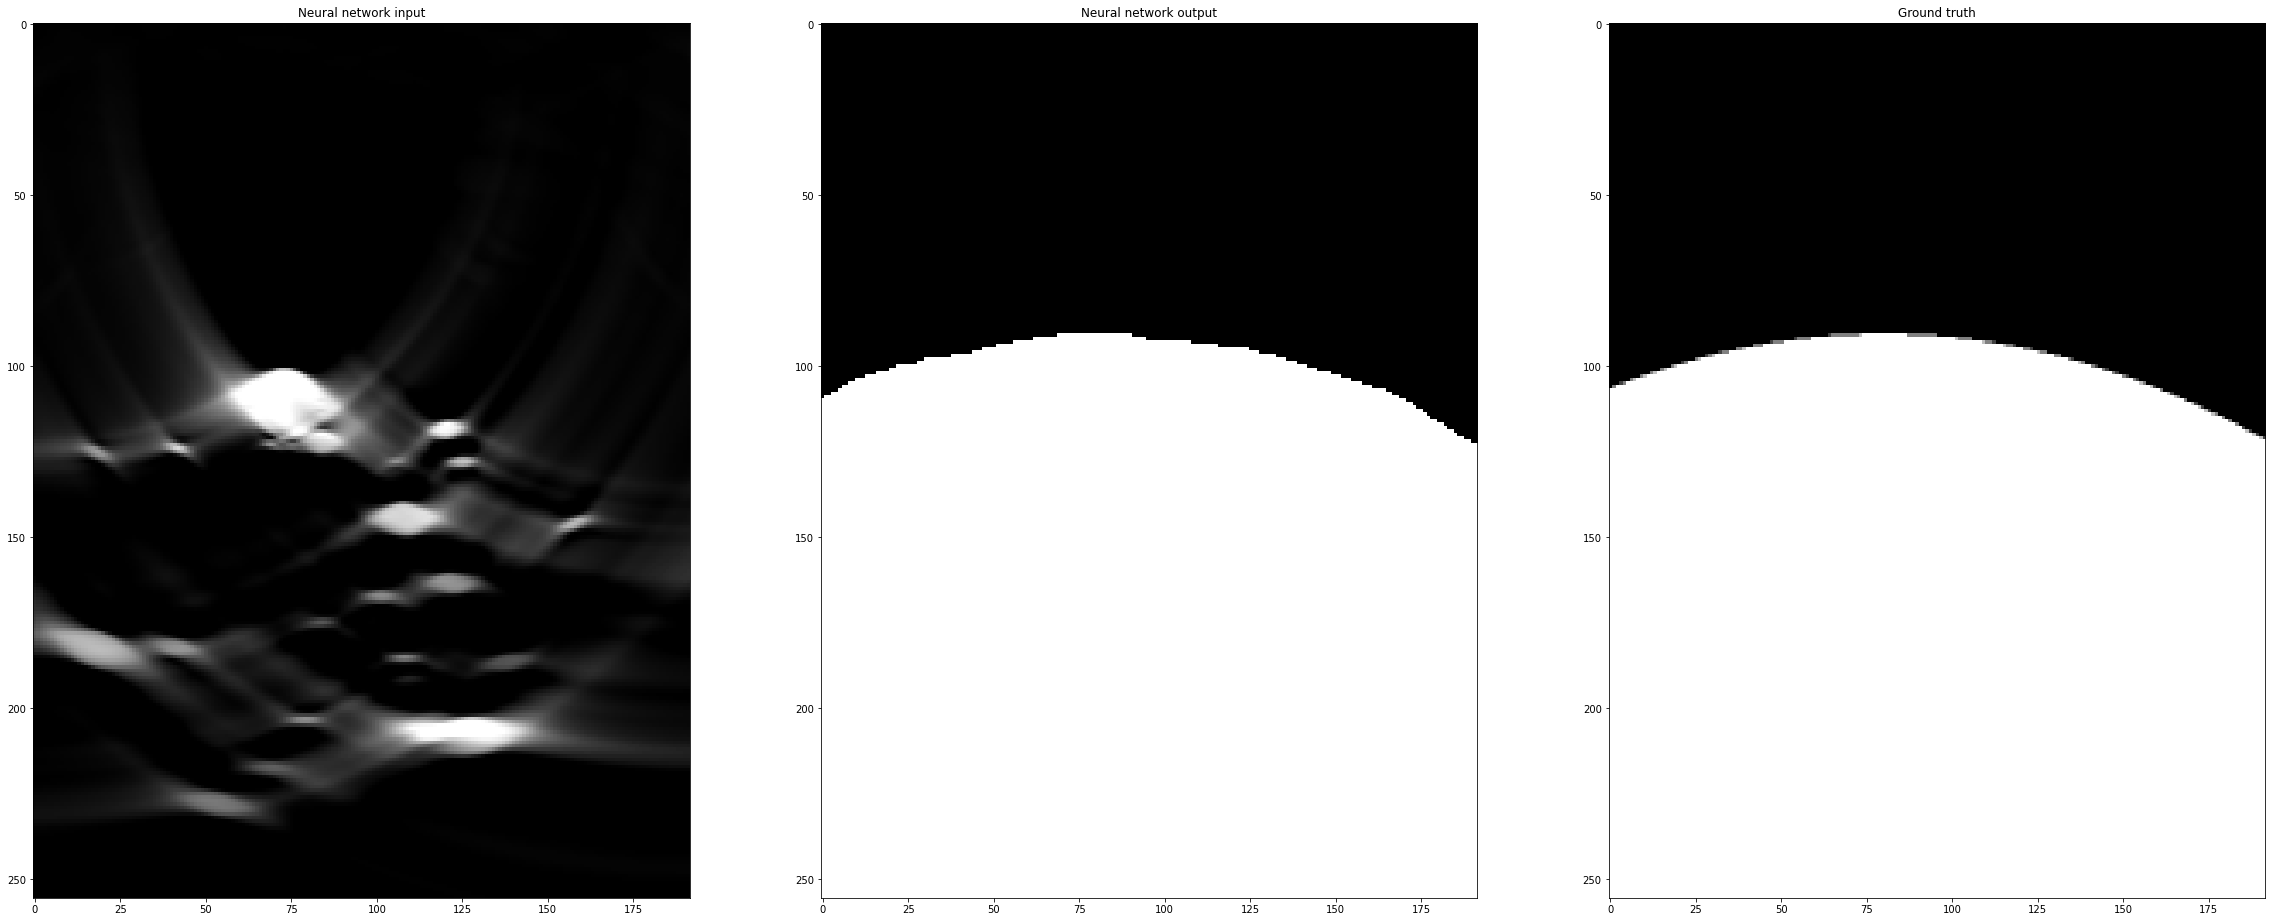

In [11]:
import data_io
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from glob import glob
import cv2 

model_file = "./saved_model/cnn_dense_FT4"
model = load_model(model_file)

test_loader = data_io.ImageDataGenerator(
    batch_size=1,
    shuffle=False,
    mode='test',
    overlying=False,
    data_augmentation=False)
y = model.predict(test_loader)

gt_loader = data_io.ImageDataGenerator(
    batch_size=1,
    shuffle=False,
    mode='test',
    overlying=False,
    data_augmentation=False)

for idx, img in enumerate(y):
    if idx % 2 == 0:
        continue
    if idx > 14:
        break
    fig, ax = plt.subplots(1, 3, figsize=(40, 30))
    x, gt = gt_loader.__getitem__(idx)
    
    ax[0].title.set_text("Neural network input")
    ax[0].imshow(x[0, :, :], cmap='gray')
    
    _, output = cv2.threshold(y[idx, :, :], thresh=0.5, maxval=1, type=cv2.THRESH_BINARY)
    ax[1].title.set_text("Neural network output")
    ax[1].imshow(output, cmap='gray')
    
    ax[2].title.set_text("Ground truth")
    ax[2].imshow(gt[0, :, :], cmap='gray')
    
    plt.show()
